# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
api_key = 'ef2136e3787f182c09441daecd26b3e1'
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
cities = []
try: 
    with open('cities.csv','r') as file:
        for line in file:
            city = line.strip()
            if city:
                cities.append(city)
except FileNotFoundError:
    print("Error: The file 'cities.csv' was not found.")

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

weather_data = []

#Control how many records print while still processing all cities in the loop
max_prints = 25  # Print this many statements
print_count = 0  # Initialize a counter

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Log the url, record, and set numbers    
    if print_count < max_prints:  # shows if we printed less than the limit
        print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        print_count += 1  # Increment the print counter
  
    # Add 1 to the record count
    record_count += 1

# Create endpoint URL with each city
    query_url = f"{base_url}appid={api_key}&q={city}&units=metric"

    weather_response = requests.get(query_url)

# Parse the JSON and retrieve data
    if weather_response.status_code == 200:
        weather_json = weather_response.json()
    
    # Run an API request for each of the cities
        try: 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = weather_json['coord']['lat']
            city_lng = weather_json['coord']['lon']
            city_max_temp = weather_json['main']['temp_max']
            city_humidity = weather_json['main']['humidity']
            city_clouds = weather_json['clouds']['all']
            city_wind = weather_json['wind']['speed']
            city_country = weather_json['sys']['country']
            city_date = weather_json['dt']
        
            dt = datetime.datetime.fromtimestamp(city_date).strftime('%Y-%m-%d %H:%M:%S')
  

        # Append the City information into weather_data list
            weather_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": dt
            })

    # If an error is experienced, skip the city
        except KeyError as e:
            print(f"City not found. Skipping {city}: {e}...")
    else:
        pass

    # pause to avoid rate limiting
    time.sleep(1)
#print(weather_data)
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
Processing Record 2 of Set 1 | 0,faya,18.3851,42.4509,22.06,35,21,2.6,SA,1666108228
Processing Record 3 of Set 1 | 1,farsund,58.0948,6.8047,13.3,100,0,7.65,NO,1666108228
Processing Record 4 of Set 1 | 2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
Processing Record 5 of Set 1 | 3,jamestown,42.097,-79.2353,5.77,77,100,9.77,US,1666107934
Processing Record 6 of Set 1 | 4,lanzhou,36.0564,103.7922,14.53,48,59,1.2,CN,1666108230
Processing Record 7 of Set 1 | 5,ushuaia,-54.8,-68.3,8.81,81,75,3.09,AR,1666108231
Processing Record 8 of Set 1 | 6,albany,42.6001,-73.9662,10.36,74,29,2.1,US,1666108231
Processing Record 9 of Set 1 | 7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
Processing Record 10 of Set 1 | 8,sisimiut,66.9395,-53.6735,2.72,98,100,3.79,GL,1666108235
Processing Record 11 of Set 1 | 9,saint-p

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(weather_data)

# Show Record Count
city_data_df.count()

City          187
Lat           187
Lng           187
Max Temp      187
Humidity      187
Cloudiness    187
Wind Speed    187
Country       187
Date          187
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,"1,farsund,58.0948,6.8047,13.3,100,0,7.65,NO,16...",-16.3658,-71.5004,13.00,62,20,1.03,PE,2024-12-07 19:46:24
1,"2,new norfolk,-42.7826,147.0587,11.72,58,12,1....",-16.3776,-71.5206,14.14,62,20,1.03,PE,2024-12-07 19:46:26
2,"3,jamestown,42.097,-79.2353,5.77,77,100,9.77,U...",30.7894,29.7758,11.03,82,0,3.09,EG,2024-12-07 19:46:27
3,"4,lanzhou,36.0564,103.7922,14.53,48,59,1.2,CN,...",-16.3775,-71.5200,14.14,62,20,1.03,PE,2024-12-07 19:46:28
4,"5,ushuaia,-54.8,-68.3,8.81,81,75,3.09,AR,16661...",30.8066,29.7305,10.97,82,0,3.09,EG,2024-12-07 19:46:29


In [22]:
import os
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [23]:
# Export the City_Data into a csv
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City")

# Display sample data
city_data_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
0,"1,farsund,58.0948,6.8047,13.3,100,0,7.65,NO,16...",-16.3658,-71.5004,13.00,62,20,1.03,PE,2024-12-07 19:46:24
1,"2,new norfolk,-42.7826,147.0587,11.72,58,12,1....",-16.3776,-71.5206,14.14,62,20,1.03,PE,2024-12-07 19:46:26
2,"3,jamestown,42.097,-79.2353,5.77,77,100,9.77,U...",30.7894,29.7758,11.03,82,0,3.09,EG,2024-12-07 19:46:27
3,"4,lanzhou,36.0564,103.7922,14.53,48,59,1.2,CN,...",-16.3775,-71.5200,14.14,62,20,1.03,PE,2024-12-07 19:46:28
4,"5,ushuaia,-54.8,-68.3,8.81,81,75,3.09,AR,16661...",30.8066,29.7305,10.97,82,0,3.09,EG,2024-12-07 19:46:29


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [29]:
city_data_df.head

<bound method NDFrame.head of                                                  City.1      Lat       Lng  \
City                                                                         
0     1,farsund,58.0948,6.8047,13.3,100,0,7.65,NO,16... -16.3658  -71.5004   
1     2,new norfolk,-42.7826,147.0587,11.72,58,12,1.... -16.3776  -71.5206   
2     3,jamestown,42.097,-79.2353,5.77,77,100,9.77,U...  30.7894   29.7758   
3     4,lanzhou,36.0564,103.7922,14.53,48,59,1.2,CN,... -16.3775  -71.5200   
4     5,ushuaia,-54.8,-68.3,8.81,81,75,3.09,AR,16661...  30.8066   29.7305   
...                                                 ...      ...       ...   
182   391,saint-francois,46.4154,3.9054,23.69,57,0,4...  14.5994  120.9887   
183   394,quesnel,52.9999,-122.5029,1.28,93,0,1.03,C...  14.5998  120.9854   
184   404,georgiyevskoye,58.731,45.024,5.97,93,100,2...  40.2042   97.3460   
185   475,nabire,-3.3667,135.4833,24.46,91,100,1.57,...  34.4163 -106.7679   
186   568,road town,18.4167,-64.61

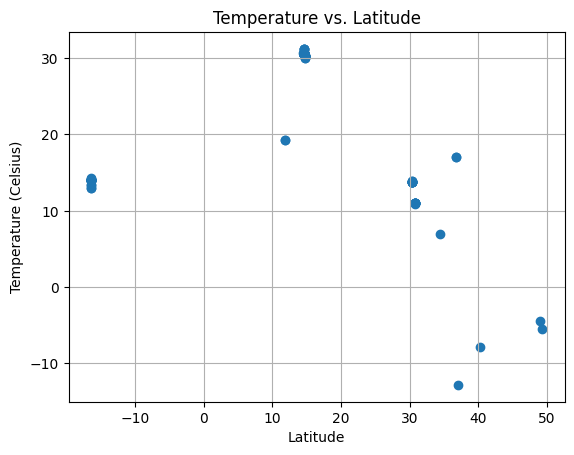

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

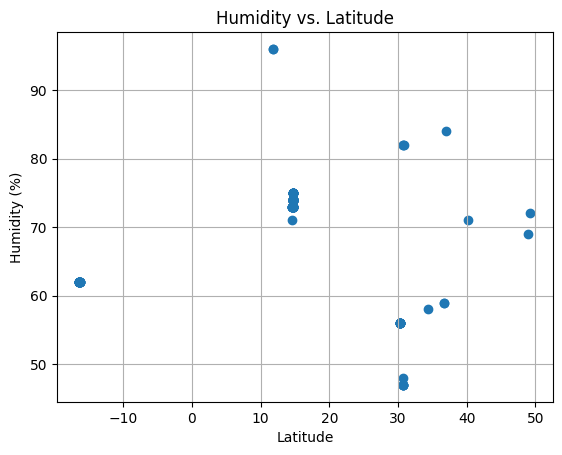

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

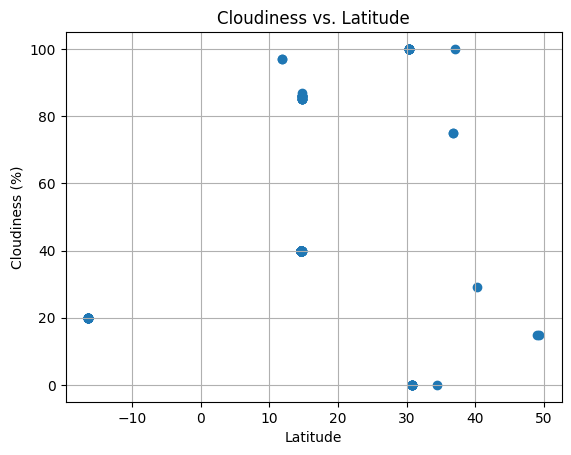

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

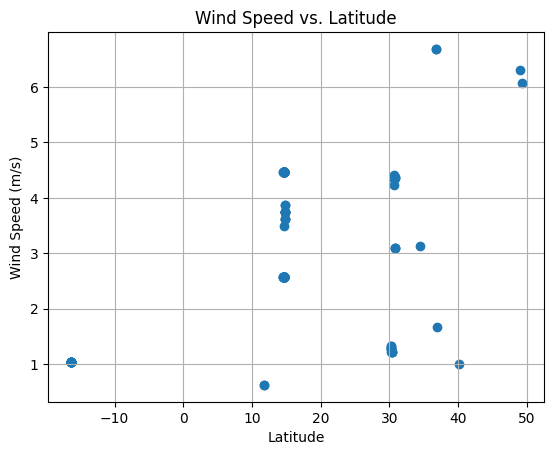

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    y_pred = slope * x + intercept
    

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
2,"3,jamestown,42.097,-79.2353,5.77,77,100,9.77,U...",30.7894,29.7758,11.03,82,0,3.09,EG,2024-12-07 19:46:27
4,"5,ushuaia,-54.8,-68.3,8.81,81,75,3.09,AR,16661...",30.8066,29.7305,10.97,82,0,3.09,EG,2024-12-07 19:46:29
7,"8,sisimiut,66.9395,-53.6735,2.72,98,100,3.79,G...",14.6573,120.9656,30.66,74,40,2.57,PH,2024-12-07 19:46:32
10,"11,nikolskoye,59.7035,30.7861,8.94,90,100,3.22...",30.2934,31.7215,13.73,56,100,1.26,EG,2024-12-07 19:46:36
20,"21,nuevo laredo,27.4763,-99.5164,12.15,87,75,3...",30.7849,29.6042,10.99,82,0,3.09,EG,2024-12-07 19:46:47


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
0,"1,farsund,58.0948,6.8047,13.3,100,0,7.65,NO,16...",-16.3658,-71.5004,13.00,62,20,1.03,PE,2024-12-07 19:46:24
1,"2,new norfolk,-42.7826,147.0587,11.72,58,12,1....",-16.3776,-71.5206,14.14,62,20,1.03,PE,2024-12-07 19:46:26
3,"4,lanzhou,36.0564,103.7922,14.53,48,59,1.2,CN,...",-16.3775,-71.5200,14.14,62,20,1.03,PE,2024-12-07 19:46:28
5,"6,albany,42.6001,-73.9662,10.36,74,29,2.1,US,1...",-16.3670,-71.5066,13.36,62,20,1.03,PE,2024-12-07 19:46:30
6,"7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,...",-16.3676,-71.5075,13.36,62,20,1.03,PE,2024-12-07 19:46:31


###  Temperature vs. Latitude Linear Regression Plot

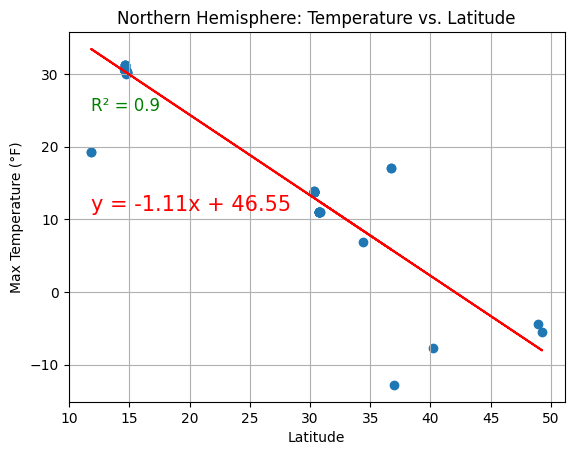

In [143]:
# Linear regression on Northern Hemisphere
def create_linear_regression_plot(x, y, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.scatter(x, y)
    y_pred = slope * x + intercept
    plt.plot(x, y_pred, color='red')
    plt.annotate(line_eq, (min(x), max(y) - 20), fontsize=15, color="red")
    plt.text(min(x), max(y) * 0.8, f'R² = {round(r_value**2, 2)}', fontsize=12, color='green')
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (°F)")
    plt.grid(True)
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Northern Hemisphere: Temperature vs. Latitude')
plt.show()

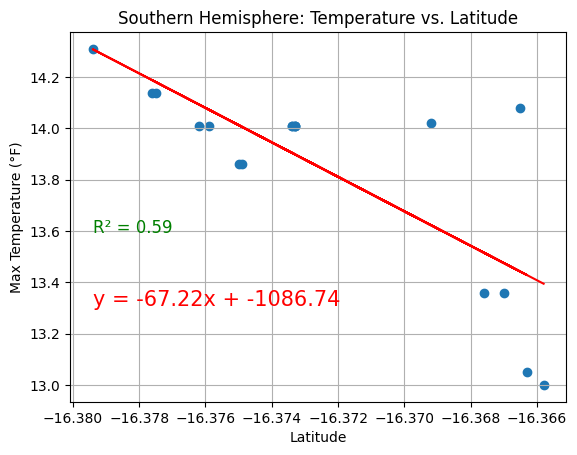

In [137]:
# Linear regression on Southern Hemisphere
def create_linear_regression_plot(x, y, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.scatter(x, y)
    y_pred = slope * x + intercept
    plt.plot(x, y_pred, color='red')
    plt.annotate(line_eq, (min(x), max(y) - 1), fontsize=15, color="red")
    plt.text(min(x), max(y) * 0.95, f'R² = {round(r_value**2, 2)}', fontsize=12, color='green')
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (°F)")
    plt.grid(True)
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Southern Hemisphere: Temperature vs. Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

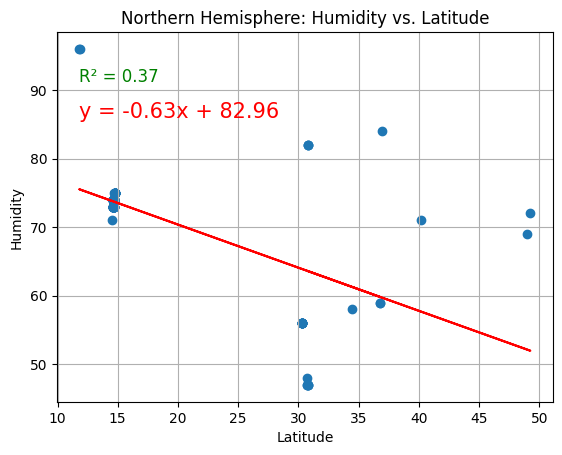

In [123]:
# Northern Hemisphere
def create_linear_regression_plot(x, y, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.scatter(x, y)
    y_pred = slope * x + intercept
    plt.plot(x, y_pred, color='red')
    plt.annotate(line_eq, (min(x), max(y) - 10), fontsize=15, color="red")
    plt.text(min(x), max(y) * 0.95, f'R² = {round(r_value**2, 2)}', fontsize=12, color='green')
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Humidity")
    plt.grid(True)
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Northern Hemisphere: Humidity vs. Latitude')
plt.show()

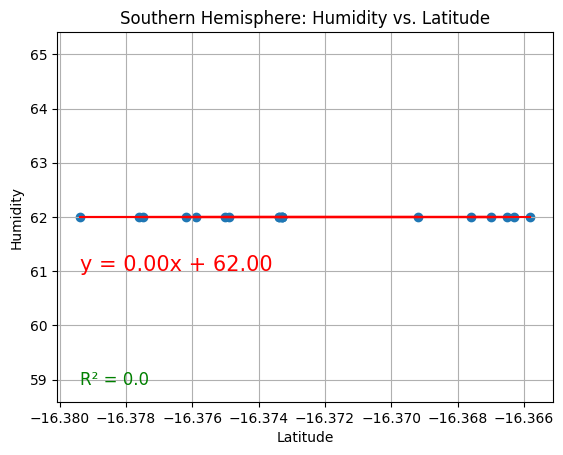

In [146]:
# Southern Hemisphere
def create_linear_regression_plot(x, y, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.scatter(x, y)
    y_pred = slope * x + intercept
    plt.plot(x, y_pred, color='red')
    plt.annotate(line_eq, (min(x), max(y) - 1), fontsize=15, color="red")
    plt.text(min(x), max(y) * 0.95, f'R² = {round(r_value**2, 2)}', fontsize=12, color='green')
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Humidity")
    plt.grid(True)
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Southern Hemisphere: Humidity vs. Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

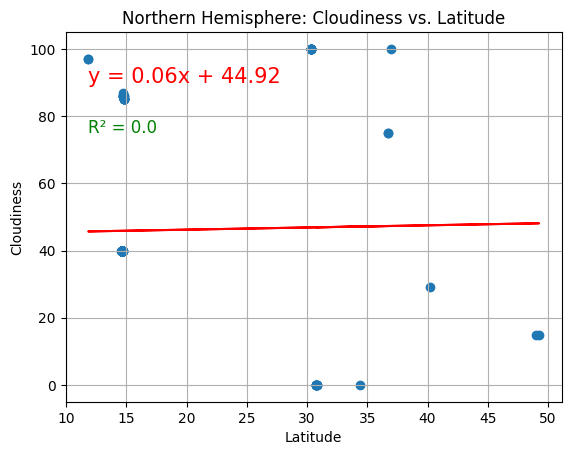

In [129]:
# Northern Hemispheredef create_linear_regression_plot(x, y, title):
def create_linear_regression_plot(x, y, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.scatter(x, y)
    y_pred = slope * x + intercept
    plt.plot(x, y_pred, color='red')
    plt.annotate(line_eq, (min(x), max(y) - 10), fontsize=15, color="red")
    plt.text(min(x), max(y) * 0.75, f'R² = {round(r_value**2, 2)}', fontsize=12, color='green')
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")
    plt.grid(True)
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Northern Hemisphere: Cloudiness vs. Latitude')
plt.show()

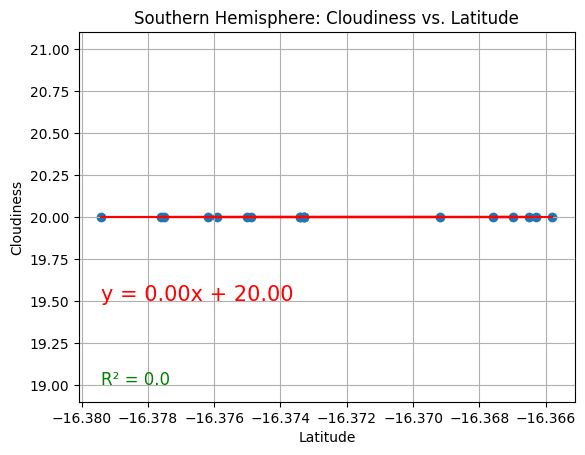

In [151]:
# Southern Hemisphere
def create_linear_regression_plot(x, y, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.scatter(x, y)
    y_pred = slope * x + intercept
    plt.plot(x, y_pred, color='red')
    plt.annotate(line_eq, (min(x), max(y) - .5), fontsize=15, color="red")
    plt.text(min(x), max(y) * 0.95, f'R² = {round(r_value**2, 2)}', fontsize=12, color='green')
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")
    plt.grid(True)
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Southern Hemisphere: Cloudiness vs. Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

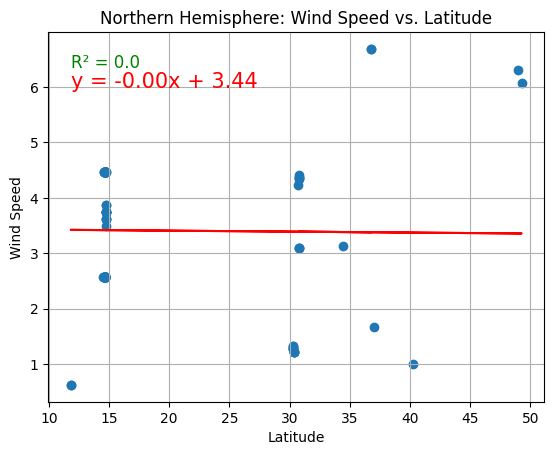

In [154]:
# Northern Hemisphere
def create_linear_regression_plot(x, y, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.scatter(x, y)
    y_pred = slope * x + intercept
    plt.plot(x, y_pred, color='red')
    plt.annotate(line_eq, (min(x), max(y) - .7), fontsize=15, color="red")
    plt.text(min(x), max(y) * 0.95, f'R² = {round(r_value**2, 2)}', fontsize=12, color='green')
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed")
    plt.grid(True)
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Northern Hemisphere: Wind Speed vs. Latitude')
plt.show()

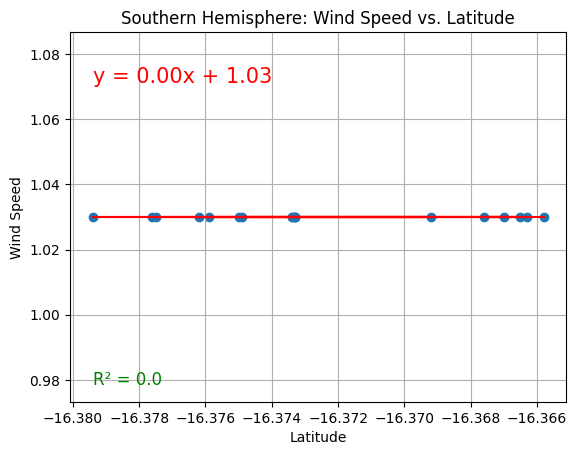

In [169]:
# Southern Hemisphere
def create_linear_regression_plot(x, y, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.scatter(x, y)
    y_pred = slope * x + intercept
    plt.plot(x, y_pred, color='red')
    plt.annotate(line_eq, (min(x), max(y) * 1.04), fontsize=15, color="red")
    plt.text(min(x), max(y) * 0.95, f'R² = {round(r_value**2, 2)}', fontsize=12, color='green')
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed")
    plt.grid(True)
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Southern Hemisphere: Wind Speed vs. Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE